# Lab 1

In [6]:
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
#
# TOOD: Import whatever needs to be imported to make this work
#
# .. your code here ..
matplotlib.style.use('ggplot') # Look Pretty


In [22]:
#
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'

#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..
filePath = 'Datasets/CrimesFrom2001TD.csv'

df = pd.read_csv(filePath)


In [23]:
print(df.describe())
print('\n')
print(df.head(5))

                 ID          IUCR          Beat      District          Ward  \
count  1.402000e+04  14020.000000  14020.000000  14020.000000  14020.000000   
mean   5.599568e+06   1660.338160   1089.771683     10.338802     19.573110   
std    2.459980e+06      9.194826    619.379545      6.068178     12.214434   
min    1.316693e+06   1610.000000    111.000000      1.000000      0.000000   
25%    3.430463e+06   1661.000000    623.000000      6.000000      8.000000   
50%    5.607460e+06   1661.000000   1014.000000     10.000000     20.000000   
75%    7.563422e+06   1661.000000   1523.000000     15.000000     28.000000   
max    1.071025e+07   1697.000000   2535.000000     25.000000     50.000000   

       Community Area  FBI Code  X Coordinate  Y Coordinate          Year  \
count    14020.000000   14020.0  1.402000e+04  1.402000e+04  14020.000000   
mean        36.945792      19.0  1.154175e+06  1.868134e+06   2007.085449   
std         21.633194       0.0  9.911761e+04  1.606483e+

In [11]:
#
# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
df = df.dropna(axis=0, thresh=len(df.columns))

In [16]:
#
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
print(df.dtypes)
print('\n')
print(df.describe())
print('\n')
print(df.head(5))

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


                 ID          IUCR          Beat      District          Ward  \
count  1.280500e+04  12805.000000  12805.000000

In [13]:
#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
df['Date'] = pd.to_datetime(df['Date'])

[[-87.75691323  41.8934715 ]
 [-87.70956145  41.87814238]
 [-87.6646737   41.77285131]
 [-87.63119446  41.69666143]
 [-87.684885    41.98183762]
 [-87.58255757  41.75261504]
 [-87.61948216  41.80344824]]


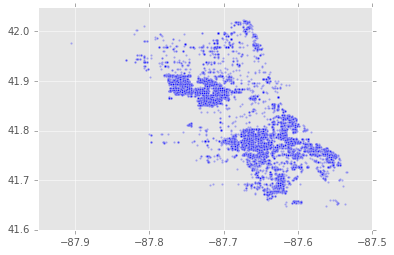

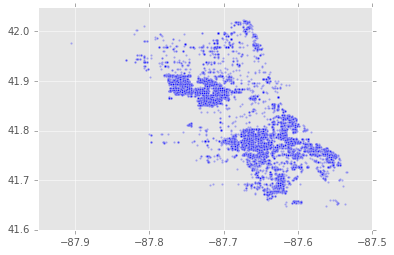

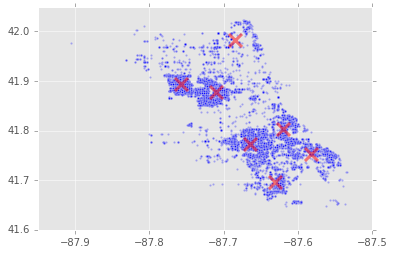

In [18]:


def doKMeans(df):
  #
  # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
  # and Latitude locations in your dataset. Longitude = x, Latitude = y
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

  #
  # TODO: Filter df so that you're only looking at Longitude and Latitude,
  # since the remaining columns aren't really applicable for this purpose.
  #
  # .. your code here ..
  df = df.loc[:, ['Longitude', 'Latitude']]

  #
  # TODO: Use K-Means to try and find seven cluster centers in this df.
  #
  # .. your code here ..
  kmeans_model = KMeans(n_clusters=7)
  kmeans_model.fit(df)
  labels=kmeans_model.predict(df)
  centroids=kmeans_model.cluster_centers_

  #
  # INFO: Print and plot the centroids...
  centroids = kmeans_model.cluster_centers_
  ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
  print centroids



# INFO: Print & Plot your data
doKMeans(df)
plt.show()



[[-87.66446281  41.77610384]
 [-87.75522816  41.89024948]
 [-87.63505496  41.70537571]
 [-87.61880346  41.79263249]
 [-87.67728179  41.97032566]
 [-87.58056248  41.75077512]
 [-87.71229732  41.87455488]]


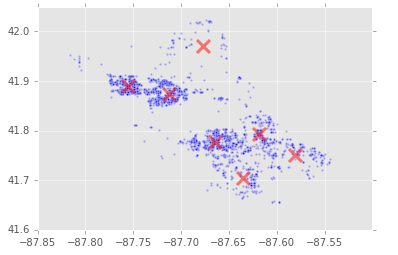

In [21]:


#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..



# INFO: Print & Plot your data
doKMeans(df[df['Date']>'2011-01-01'])
plt.show()
